# Modelo para la Ciudad de Bogotá

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##Sección de código para ejecutar el ejercicio en COLAB sin realizar ningún cambio adicional.
#from google.colab import drive
#drive.mount('/content/drive')
#baseUrl = '/content/drive/Shared drives/Analitica Predictiva/covid-19-flr-analitica-predictiva'
#os.chdir(baseUrl)

Librerias requeridas para realizar los modelos.

In [11]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Modelo Corto Plazo

In [12]:
ciudades = ['Bogotá D.C.','Medellín','Cali','Barranquilla', 'Cartagena de Indias']
names = ['Bogota','Medellin','Cali','Barranquilla','Cartagena']
id_city = 0
name = names[id_city]
urlDataSet = 'Datos/data_{}.pickle'.format(name)
datename = 'fecha_infeccioso'

Se carga el dataset generado en la sección de preprocesamiento, se muestran los últimos 20 registros, para validar visualmente los ultimos días de información.

In [13]:
df_city = pd.read_pickle(urlDataSet)
df = df_city.copy()
df.tail(20)

,dias,semana,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
fecha_infeccioso,,,,,,,,,
2020-08-16,171,24,1194.0,4541.0,83.0,137715.0,91713.0,4824.0,41178.0
2020-08-17,172,24,1264.0,4896.0,75.0,138979.0,96609.0,4899.0,37471.0
2020-08-18,173,24,1555.0,4542.0,101.0,140534.0,101151.0,5000.0,34383.0
2020-08-19,174,24,1861.0,4788.0,89.0,142395.0,105939.0,5089.0,31367.0
2020-08-20,175,25,1885.0,2919.0,79.0,144280.0,108858.0,5168.0,30254.0
2020-08-21,176,25,1281.0,2571.0,80.0,145561.0,111429.0,5248.0,28884.0
2020-08-22,177,25,877.0,3290.0,81.0,146438.0,114719.0,5329.0,26390.0
2020-08-23,178,25,753.0,6763.0,61.0,147191.0,121482.0,5390.0,20319.0
2020-08-24,179,25,849.0,3560.0,71.0,148040.0,125042.0,5461.0,17537.0


## Análisis
Mostramos los casos activos


<AxesSubplot:xlabel='fecha_infeccioso'>

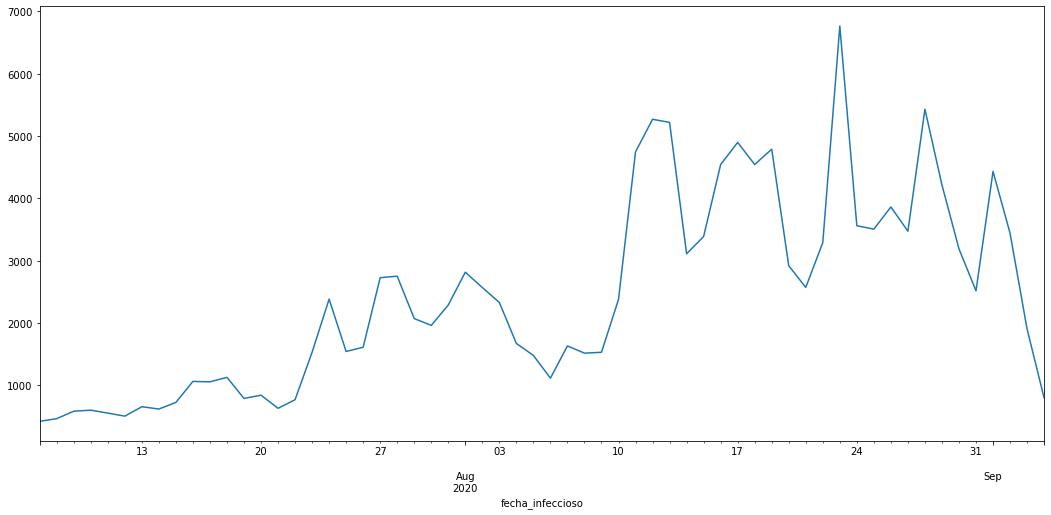

In [21]:
f = plt.figure(figsize=(18,8))
df_city['recuperados'][-60:].plot()

In [99]:
df_city.shape[0]

190

# Separación de de datos
Separamos los datos usando train test split

In [131]:
dias_val=30
dias_restantes = df_city.shape[0]-dias_val
test_size = 0.25

dias_fit = math.floor(dias_restantes*(1-test_size))
dias_test = math.floor(dias_restantes*test_size)

x_df = df_city[['infectados','recuperados','muertos']]
x_reshape = x_df.values[:].reshape(-1,3)


#Se divide el reston del cojunto de datos en train y testing


#Preparación
Y = df_city['infectados'].values[:].reshape(-1,1)
X = x_df

#Los datos de validación son los datos de los últimos 7 días.
X_val = X[-dias_val:]
X_fit = X[:dias_fit]
X_test = X[dias_fit:(dias_fit+dias_test)]

Y_val = Y[-dias_val:]
Y_fit = Y[:dias_fit]
Y_test =Y[dias_fit:(dias_fit+dias_test)]

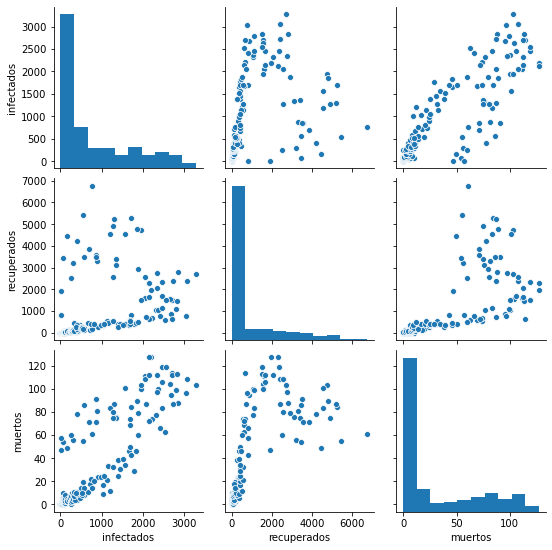

In [70]:
import seaborn as sns
sns.pairplot(x_df)

<AxesSubplot:>

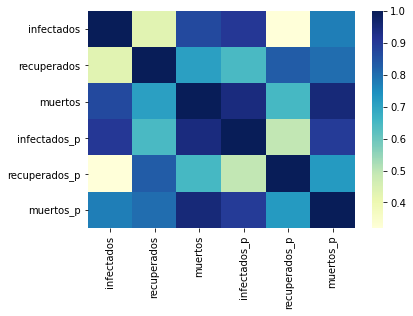

In [106]:
c_df = pd.concat([x_df, x_df.shift(6,fill_value=0)],axis=1)
c_df.columns = ['infectados','recuperados','muertos','infectados_p','recuperados_p','muertos_p']
corr = c_df.corr()
sns.set_palette(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
sns.heatmap(corr,cmap="YlGnBu")

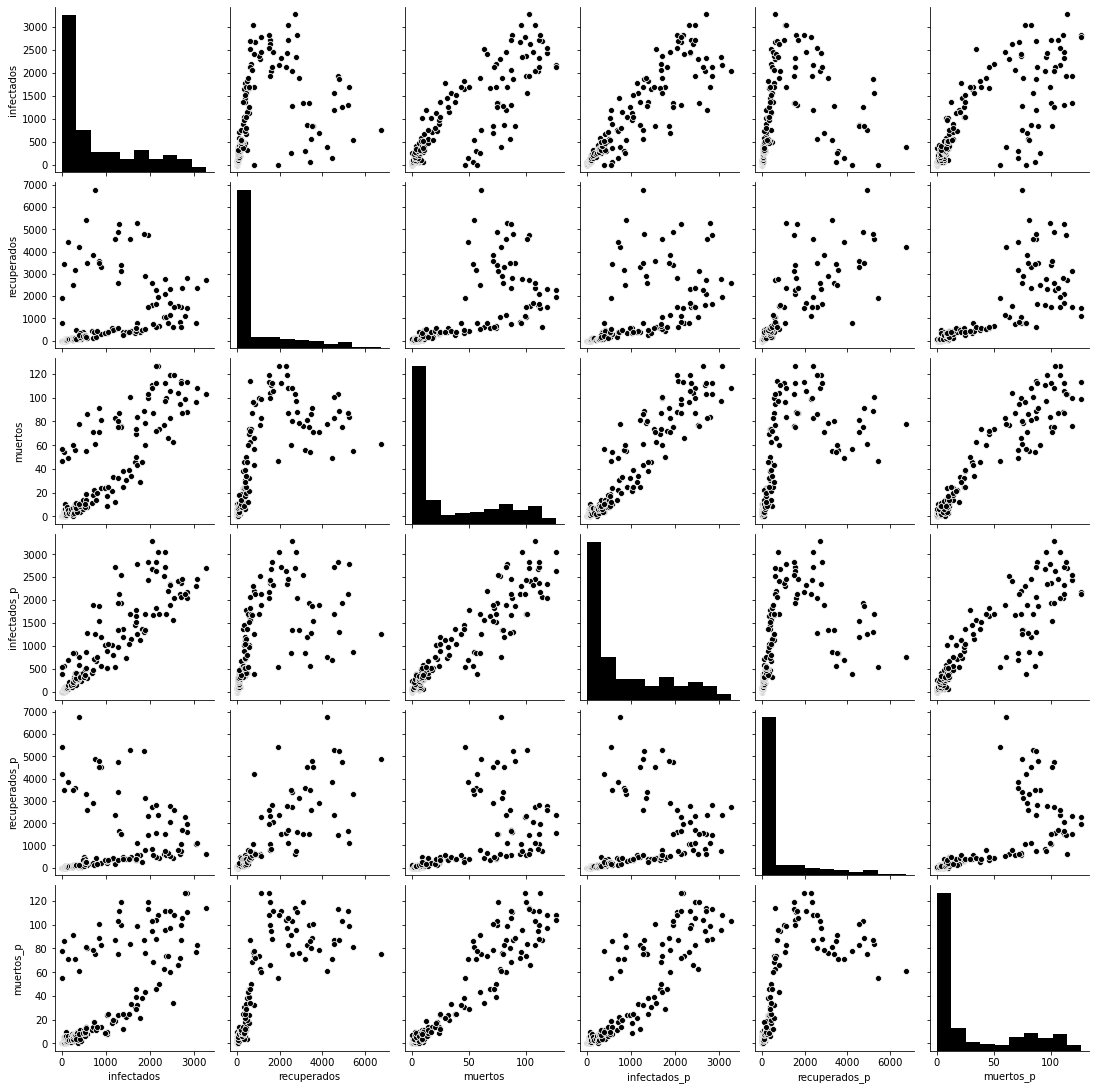

In [107]:
sns.pairplot(c_df)

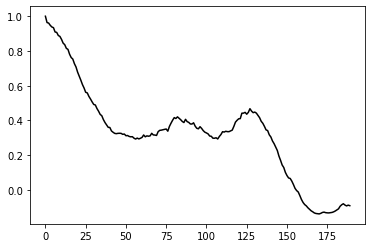

In [157]:
corr_x_s = x_df['infectados'].copy()
corr_x = pd.DataFrame()
corr_x['infectados']=x_df['infectados']
corr_array = []
for i in range(190):
    name = 'infectados {}'.format(i)
    corr_x[name]=corr_x_s.shift(i,fill_value=0)
    corr_array.append(corr_x[['infectados',name]].corr().values[0][1])

plt.plot(corr_array)

In [58]:
df_city.drop(columns=['infectados']).values[:].reshape(-1,len(df_city.drop(columns=['infectados'])))
len(df_city.drop(columns=['infectados']))

8

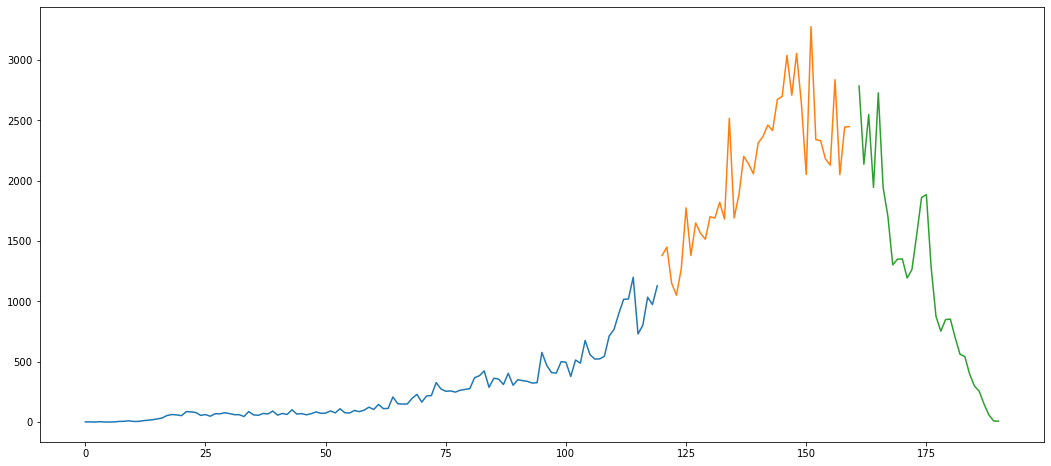

In [45]:
def plot():
    f = plt.figure(figsize=(18,8))
    plt.plot(X_fit,Y_fit,label='Entrenamiento')
    plt.plot(X_test,Y_test,label='Test')
    plt.plot(X_val,Y_val,label='Validacion')
    
plot()

In [ ]:
#Hallamos la tendencia a traves de una arp

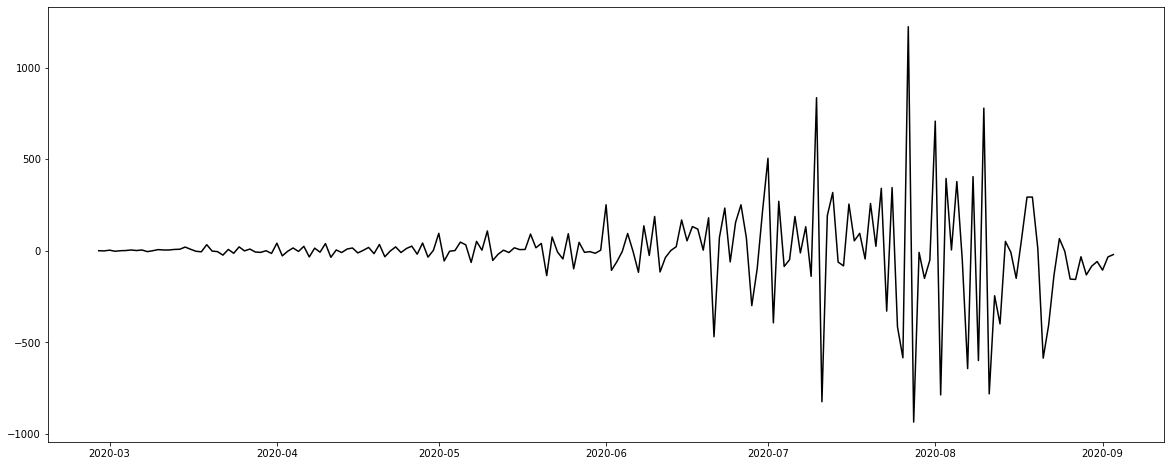

In [96]:
#Eliminacion de la tendencia
infectados_serie = df_city['infectados'].copy()
infectados_diff = infectados_serie - infectados_serie.shift(1) 
f = plt.figure(figsize=(20,8))
l15 = infectados_diff
plt.plot(l15,'-k')

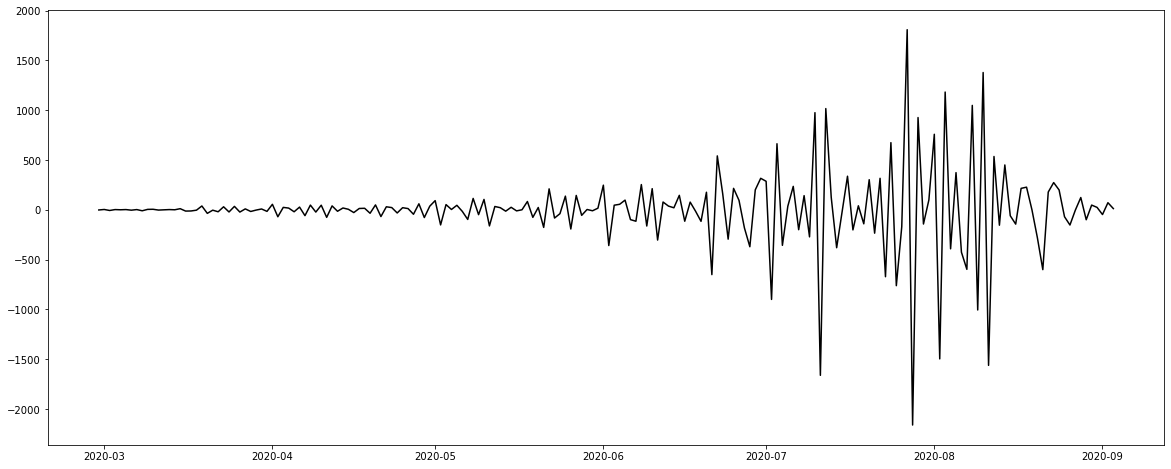

In [76]:
f = plt.figure(figsize=(20,8))
infectados_diff2 = infectados_diff - infectados_diff.shift(1) 
plt.plot(infectados_diff2,'-k')